In [1]:
# author: Yuman Lin
# Algo Depth project
# predict volatility of SPY

# Data processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf 

data = pd.read_csv("SPY.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-21,201.729996,203.940002,197.520004,197.830002,179.102432,346588500
1,2015-08-24,187.490005,197.479996,182.399994,189.500000,171.561005,507244300
2,2015-08-25,195.429993,195.449997,186.919998,187.270004,169.542130,369833100
3,2015-08-26,192.080002,194.789993,188.369995,194.460007,176.051483,339257000
4,2015-08-27,197.020004,199.419998,195.210007,199.270004,180.406158,274143900


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2020-08-17,337.940002,338.339996,336.850006,337.910004,337.910004,35481000
1256,2020-08-18,338.339996,339.100006,336.609985,338.640015,338.640015,38733900
1257,2020-08-19,339.049988,339.609985,336.619995,337.230011,337.230011,68054200
1258,2020-08-20,335.359985,338.799988,335.220001,338.279999,338.279999,42207800
1259,2020-08-21,337.920013,339.720001,337.549988,339.480011,339.480011,55106600


In [4]:
daily_return = (data["Adj Close"][1:].values - data["Adj Close"][:-1].values)/data["Adj Close"][:-1].values
daily_return

array([-0.04210678, -0.01176768,  0.03839372, ..., -0.00416373,
        0.00311357,  0.00354739])

In [5]:
data.shape

(1260, 7)

In [6]:
annual_vol = []
for i in range(0, 1260-5):
    sum_daily_return = daily_return[0+i]**2 + daily_return[1+i]**2 + daily_return[2+i]**2 + daily_return[3+i]**2 + daily_return[4+i]**2
    volatility = np.sqrt(sum_daily_return) * np.sqrt(52)
    annual_vol.append(volatility)

In [7]:
annual_vol

[0.45592029672975504,
 0.34505427774992525,
 0.3977284773159136,
 0.31665531024962623,
 0.26169069697600955,
 0.2835423882978809,
 0.3314263444172873,
 0.2698419113666229,
 0.23583847955906415,
 0.23804828536917888,
 0.21323350824440043,
 0.14405290905520782,
 0.12393334240260588,
 0.11866955918743446,
 0.16399528223405938,
 0.16603360039135134,
 0.16793972009795496,
 0.15630378615674395,
 0.157632266862328,
 0.10471644102994657,
 0.20574458268392778,
 0.1832704255870777,
 0.22706411458768722,
 0.22634548104245888,
 0.25066242521477017,
 0.21574089607210495,
 0.2171100268731147,
 0.18033863826061552,
 0.19080105594479144,
 0.1575457937455646,
 0.09165464596272253,
 0.09927420893969562,
 0.08696133771911108,
 0.12483911547204991,
 0.12900098764959345,
 0.12887015604961558,
 0.12094320737085079,
 0.12423078851651975,
 0.13421826740480924,
 0.15227497427004544,
 0.1532616938717891,
 0.1536175048684731,
 0.16830001424601382,
 0.11619472119315866,
 0.09065871059746461,
 0.12322226399901422,

In [8]:
df = data.drop([0,1,2,3,4], axis = 0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800


In [9]:
daily_return_new = daily_return[4:]
daily_return_new

array([ 5.01590417e-05, -8.07911941e-03, -2.98478057e-02, ...,
       -4.16372531e-03,  3.11356631e-03,  3.54739270e-03])

In [10]:
df.shape

(1255, 7)

In [11]:
len(daily_return_new)

1255

In [12]:
len(annual_vol)

1255

In [13]:
# dataframe of original data and volatility
df["Daily Return"] = daily_return_new
df["Annual Volatility"] = annual_vol
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691


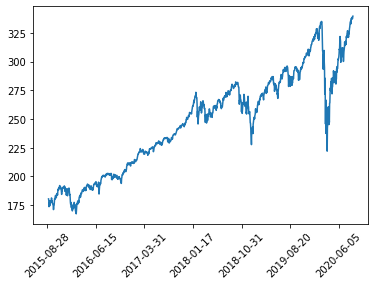

In [14]:
plt.plot(df["Adj Close"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.show()

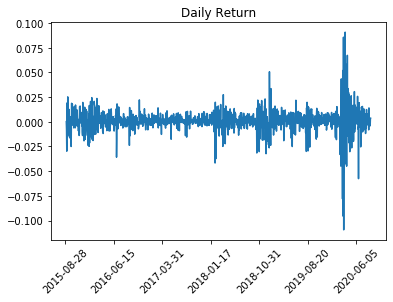

In [15]:
plt.plot(df["Daily Return"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.title("Daily Return")
plt.show()

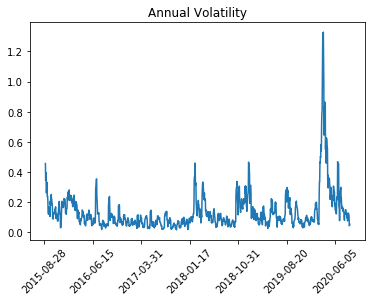

In [16]:
plt.plot(df["Annual Volatility"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200],rotation=45)
plt.title("Annual Volatility")
plt.show()

# Feature Engineering

In [17]:
df.shape

(1255, 9)

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691


## (1) Moving average

In [19]:
# add new columns
df['EMA_5day'] = df.iloc[:,8].ewm(span=5,adjust=False).mean()
df['EMA_20day'] = df.iloc[:,8].ewm(span=20,adjust=False).mean()
df['EMA_60day'] = df.iloc[:,8].ewm(span=60,adjust=False).mean()

In [20]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Annual Volatility,EMA_5day,EMA_20day,EMA_60day
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.345054,0.418965,0.445362,0.452285
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.397728,0.411886,0.440825,0.450497
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.316655,0.380143,0.428999,0.446108
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.261691,0.340659,0.413065,0.440062


In [21]:
df_vol = df["Annual Volatility"]
df.drop('Annual Volatility', axis = 1, inplace = True)
df["Annual Volatility"] = df_vol
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,0.261691


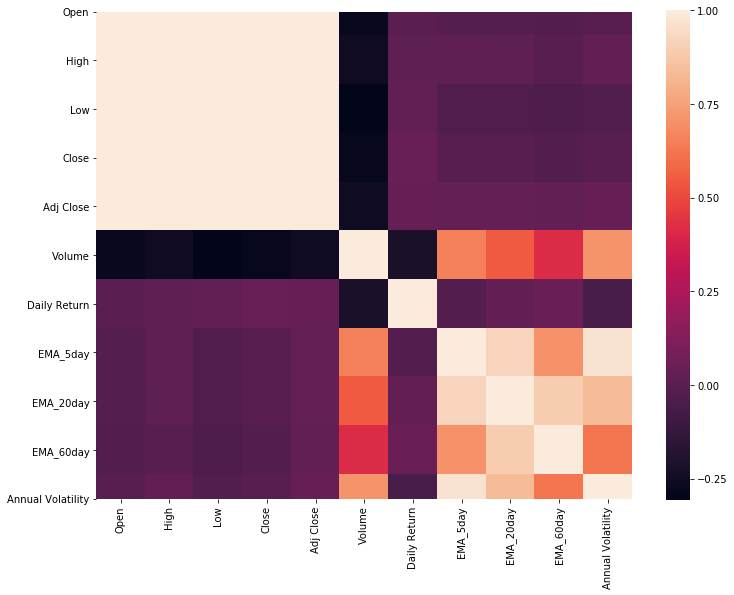

In [22]:
#correlation matrix
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)

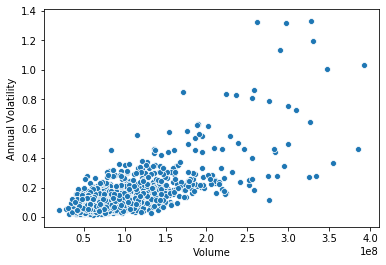

In [23]:
# scatter plot
sns.scatterplot(x="Volume", y="Annual Volatility", data=df)

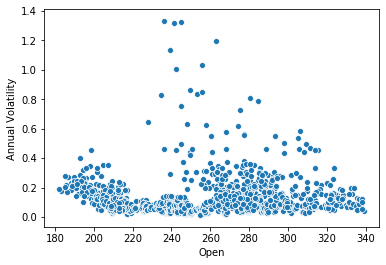

In [24]:
# scatter plot
sns.scatterplot(x="Open", y="Annual Volatility", data=df)

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,0.261691


In [26]:
# volume has high correlation
# add a single moving average for Volume
df['SMA_5'] = df.iloc[:,6].rolling(window=5).mean()
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,Annual Volatility,SMA_5
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,0.455920,NaN
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,0.345054,NaN
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,0.397728,NaN
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,0.316655,NaN
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,0.261691,178414140.0
10,2015-09-04,192.850006,193.860001,191.610001,192.589996,174.358505,207081000,-0.015137,0.321620,0.400730,0.434930,0.283542,187747460.0


In [27]:
df["SMA_5"][5] = df["SMA_5"][9]
df["SMA_5"][6] = df["SMA_5"][9]
df["SMA_5"][7] = df["SMA_5"][9]
df["SMA_5"][8] = df["SMA_5"][9]
df.head(6)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,Annual Volatility,SMA_5
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,0.455920,178414140.0
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,0.345054,178414140.0
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,0.397728,178414140.0
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,0.316655,178414140.0
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,0.261691,178414140.0
10,2015-09-04,192.850006,193.860001,191.610001,192.589996,174.358505,207081000,-0.015137,0.321620,0.400730,0.434930,0.283542,187747460.0


In [28]:
df_vol = df["Annual Volatility"]
df.drop('Annual Volatility', axis = 1, inplace = True)
df["Annual Volatility"] = df_vol
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,SMA_5,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,178414140.0,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,178414140.0,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,178414140.0,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,178414140.0,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,178414140.0,0.261691


## (2) Lag features for Annual Volatility

In [29]:
# lag features
df['Lag_Volatility1'] = df['Annual Volatility'].shift(1)
df['Lag_Volatility5'] = df['Annual Volatility'].shift(5)
df["Lag_Volatility1"] = df["Lag_Volatility1"].fillna(df["Lag_Volatility1"].mean())
df["Lag_Volatility5"] = df["Lag_Volatility5"].fillna(df["Lag_Volatility5"].mean())
# df.drop("Lag Volatility", axis = 1, inplace = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,SMA_5,Annual Volatility,Lag_Volatility1,Lag_Volatility5
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,178414140.0,0.455920,0.136702,0.136888
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,178414140.0,0.345054,0.455920,0.136888
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,178414140.0,0.397728,0.345054,0.136888
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,178414140.0,0.316655,0.397728,0.136888
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,178414140.0,0.261691,0.316655,0.136888


In [30]:
df_vol = df["Annual Volatility"]
df.drop('Annual Volatility', axis = 1, inplace = True)
df["Annual Volatility"] = df_vol
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,SMA_5,Lag_Volatility1,Lag_Volatility5,Annual Volatility
5,2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,178414140.0,0.136702,0.136888,0.455920
6,2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,178414140.0,0.455920,0.136888,0.345054
7,2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,178414140.0,0.345054,0.136888,0.397728
8,2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,178414140.0,0.397728,0.136888,0.316655
9,2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,178414140.0,0.316655,0.136888,0.261691


# Models

In [31]:
df.shape

(1255, 15)

## Time series models

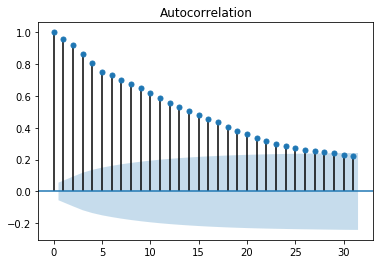

In [32]:
# Time series model

# check correlations of squared observations
from statsmodels.graphics.tsaplots import plot_acf

# create acf plot
plot_acf(df["Annual Volatility"])
plt.show()

In [33]:
# split into train/test
n_test = 29*6
train, test = df["Annual Volatility"][:-n_test], df["Annual Volatility"][-n_test:]

## (1) ARCH model, p = 25

In [34]:
# define model
from arch import arch_model
model = arch_model(train, mean='Zero', vol='ARCH', p=25)

In [35]:
# fit model
model_fit = model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005716. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:     28,   Neg. LLF: -752.0899317611547
Iteration:      2,   Func. Count:     61,   Neg. LLF: -769.4108349642825
Iteration:      3,   Func. Count:     90,   Neg. LLF: -845.3292772328191
Iteration:      4,   Func. Count:    119,   Neg. LLF: -875.7648629932748
Iteration:      5,   Func. Count:    147,   Neg. LLF: -931.5284037981721
Iteration:      6,   Func. Count:    177,   Neg. LLF: -948.7421582684083
Iteration:      7,   Func. Count:    206,   Neg. LLF: -950.382453180049
Iteration:      8,   Func. Count:    236,   Neg. LLF: -950.4576254276169
Iteration:      9,   Func. Count:    265,   Neg. LLF: -950.6443026812422
Iteration:     10,   Func. Count:    294,   Neg. LLF: -950.8994198165266
Iteration:     11,   Func. Count:    323,   Neg. LLF: -951.1060145466109
Iteration:     12,   Func. Count:    352,   Neg. LLF: -951.4997904256261
Iteration:     13,   Func. Count:    380,   Neg. LLF: -952.1674606516874
Iteration:     14,   Func. Count:    409,   Neg. LLF

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:      Annual Volatility   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                952.328
Distribution:                  Normal   AIC:                          -1852.66
Method:            Maximum Likelihood   BIC:                          -1723.03
                                        No. Observations:                 1081
Date:                Fri, Aug 28 2020   Df Residuals:                     1055
Time:                        15:50:41   Df Model:                           26
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.9211e-04  8.698e-04      0.796      0.426 [-1.013e-03,2.397e-03]
alpha[1]       0.9561  6.212e-02     15.392  1.856e-53      [  0.834,  1.078]
alpha[2]   4.0881e-11      0.178  2.300e-10      1.000      [ -0.348,  0.348]
alpha[3]   4.4442e-11      0.304  1.464e-10      1.000      [ -0.595,  0.595]
alpha[4]   4.3273e-11  6.194e-02  6.987e-10      1.000      [ -0.121,  0.121]
alpha[5]   6.6082e-11      0.128  5.148e-10      1.000      [ -0.252,  0.252]
alpha[6]       0.0105  6.596e-02      0.160      0.873      [ -0.119,  0.140]
alpha[7]   2.6189e-11  7.407e-02  3.536e-10      1.000      [ -0.145,  0.145]
alpha[8]   1.7537e-03  7.908e-02  2.218e-02      0.982      [ -0.153,  0.157]
alpha[9]   2.6660e-11      0.160  1.667e-10      1.000      [ -0.313,  0.313]
alpha[10]  3.0602e-11  5.230e-02  5.851e-10      1.000      [ -0.103,  0.103]
alpha[11]  5.1934e-11      0.160  3.252e-10      1.000      [ -0.313,  0.313]
alpha[12]  5.4136e-11  7.468e-02  7.249e-10      1.000      [ -0.146,  0.146]
alpha[13]  3.5039e-11  5.951e-02  5.887e-10      1.000      [ -0.117,  0.117]
alpha[14]  3.8274e-11      0.136  2.816e-10      1.000      [ -0.266,  0.266]
alpha[15]  3.0174e-11  5.790e-02  5.212e-10      1.000      [ -0.113,  0.113]
alpha[16]  4.6713e-11      0.304  1.537e-10      1.000      [ -0.596,  0.596]
alpha[17]  4.1545e-03      0.264  1.576e-02      0.987      [ -0.512,  0.521]
alpha[18]  2.0070e-11      0.189  1.061e-10      1.000      [ -0.371,  0.371]
alpha[19]  1.1767e-11      0.279  4.222e-11      1.000      [ -0.546,  0.546]
alpha[20]  9.8139e-04  9.534e-02  1.029e-02      0.992      [ -0.186,  0.188]
alpha[21]  1.4940e-11      0.441  3.389e-11      1.000      [ -0.864,  0.864]
alpha[22]  1.8088e-11      0.132  1.368e-10      1.000      [ -0.259,  0.259]
alpha[23]  1.6836e-11  6.091e-02  2.764e-10      1.000      [ -0.119,  0.119]
alpha[24]  2.5972e-11  4.312e-02  6.023e-10      1.000 [-8.452e-02,8.452e-02]
alpha[25]  4.7633e-03  5.417e-02  8.794e-02      0.930      [ -0.101,  0.111]
=============================================================================

Covariance estimator: robust
"""

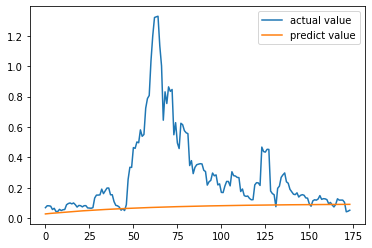

In [36]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance

plt.plot(test.values, label='actual value')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :]*3, label='predict value')
plt.legend()
plt.show()

In [37]:
# retrain the model with full dataset
model_arch = arch_model(df["Annual Volatility"], mean='Zero', vol='ARCH', p=25)
model_fit = model_arch.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01816. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:     28,   Neg. LLF: -745.2461256286144
Iteration:      2,   Func. Count:     60,   Neg. LLF: -746.8163299211836
Iteration:      3,   Func. Count:     89,   Neg. LLF: -858.9456838061528
Iteration:      4,   Func. Count:    118,   Neg. LLF: -879.5605000673288
Iteration:      5,   Func. Count:    146,   Neg. LLF: -957.1841231495249
Iteration:      6,   Func. Count:    176,   Neg. LLF: -973.6025822809551
Iteration:      7,   Func. Count:    205,   Neg. LLF: -975.2386556557749
Iteration:      8,   Func. Count:    234,   Neg. LLF: -976.3770920207438
Iteration:      9,   Func. Count:    263,   Neg. LLF: -976.4363434457644
Iteration:     10,   Func. Count:    292,   Neg. LLF: -977.2060369105469
Iteration:     11,   Func. Count:    320,   Neg. LLF: -978.2211213311239
Iteration:     12,   Func. Count:    349,   Neg. LLF: -978.5547093938438
Iteration:     13,   Func. Count:    378,   Neg. LLF: -978.9400221567772
Iteration:     14,   Func. Count:    407,   Neg. LL

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:      Annual Volatility   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                979.873
Distribution:                  Normal   AIC:                          -1907.75
Method:            Maximum Likelihood   BIC:                          -1774.24
                                        No. Observations:                 1255
Date:                Fri, Aug 28 2020   Df Residuals:                     1229
Time:                        15:50:43   Df Model:                           26
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.4921e-04  1.367e-03      0.475      0.635 [-2.031e-03,3.329e-03]
alpha[1]       0.9570  6.256e-02     15.299  7.810e-53      [  0.834,  1.080]
alpha[2]   2.7607e-12      0.212  1.302e-11      1.000      [ -0.416,  0.416]
alpha[3]       0.0000      0.507      0.000      1.000      [ -0.994,  0.994]
alpha[4]   2.7886e-11  7.945e-02  3.510e-10      1.000      [ -0.156,  0.156]
alpha[5]   3.0131e-11      0.146  2.060e-10      1.000      [ -0.287,  0.287]
alpha[6]       0.0117      0.222  5.290e-02      0.958      [ -0.423,  0.446]
alpha[7]   1.2050e-11  7.718e-02  1.561e-10      1.000      [ -0.151,  0.151]
alpha[8]   4.6094e-12      0.129  3.566e-11      1.000      [ -0.253,  0.253]
alpha[9]       0.0105      0.287  3.680e-02      0.971      [ -0.551,  0.572]
alpha[10]  2.4953e-11      0.111  2.249e-10      1.000      [ -0.217,  0.217]
alpha[11]  2.8640e-11      0.390  7.349e-11      1.000      [ -0.764,  0.764]
alpha[12]  3.1635e-11      0.133  2.381e-10      1.000      [ -0.260,  0.260]
alpha[13]  1.6971e-11      0.111  1.528e-10      1.000      [ -0.218,  0.218]
alpha[14]  2.3334e-11      0.267  8.746e-11      1.000      [ -0.523,  0.523]
alpha[15]  1.6348e-11      0.154  1.060e-10      1.000      [ -0.302,  0.302]
alpha[16]  2.9053e-11      0.673  4.314e-11      1.000      [ -1.320,  1.320]
alpha[17]  6.0215e-03      0.442  1.363e-02      0.989      [ -0.860,  0.872]
alpha[18]  1.4065e-11      0.376  3.742e-11      1.000      [ -0.737,  0.737]
alpha[19]  8.4790e-12      0.650  1.305e-11      1.000      [ -1.273,  1.273]
alpha[20]  8.1321e-13      0.147  5.519e-12      1.000      [ -0.289,  0.289]
alpha[21]  1.1516e-11      0.934  1.232e-11      1.000      [ -1.831,  1.831]
alpha[22]  2.3374e-11      0.193  1.212e-10      1.000      [ -0.378,  0.378]
alpha[23]  4.0891e-12  6.502e-02  6.289e-11      1.000      [ -0.127,  0.127]
alpha[24]  1.5996e-11  5.457e-02  2.931e-10      1.000      [ -0.107,  0.107]
alpha[25]  3.7334e-03  5.080e-02  7.349e-02      0.941   [-9.583e-02,  0.103]
=============================================================================

Covariance estimator: robust
"""

In [38]:
# forecast the test set
yhat = model_fit.forecast(horizon=5)

In [39]:
yhat.variance.values[-1, :]*8

array([0.03015892, 0.03786289, 0.04465149, 0.05042322, 0.05575247])

## (2) GARCH model

In [40]:
# garch model
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=20, q=20)
# fit model
model_fit1 = model.fit()
model_fit1.summary()

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005716. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:     43,   Neg. LLF: -705.2881924203606
Iteration:      2,   Func. Count:     86,   Neg. LLF: -951.4666778276172
Iteration:      3,   Func. Count:    130,   Neg. LLF: -951.896887450233
Iteration:      4,   Func. Count:    175,   Neg. LLF: -951.9623334840392
Iteration:      5,   Func. Count:    220,   Neg. LLF: -952.060427426434
Iteration:      6,   Func. Count:    264,   Neg. LLF: -952.1567107481906
Iteration:      7,   Func. Count:    308,   Neg. LLF: -952.1692330036307
Iteration:      8,   Func. Count:    352,   Neg. LLF: -952.1906382496516
Iteration:      9,   Func. Count:    395,   Neg. LLF: -952.2175221976977
Iteration:     10,   Func. Count:    439,   Neg. LLF: -952.2276245233218
Iteration:     11,   Func. Count:    483,   Neg. LLF: -952.2291889214418
Iteration:     12,   Func. Count:    528,   Neg. LLF: -952.2320311255005
Iteration:     13,   Func. Count:    572,   Neg. LLF: -952.2337896414401
Iteration:     14,   Func. Count:    615,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:      Annual Volatility   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                952.234
Distribution:                  Normal   AIC:                          -1822.47
Method:            Maximum Likelihood   BIC:                          -1618.06
                                        No. Observations:                 1081
Date:                Fri, Aug 28 2020   Df Residuals:                     1040
Time:                        15:50:45   Df Model:                           41
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.9565e-04  7.410e-04      0.939      0.348 [-7.567e-04,2.148e-03]
alpha[1]       0.9541  9.800e-02      9.736  2.123e-22      [  0.762,  1.146]
alpha[2]       0.0000      1.476      0.000      1.000      [ -2.893,  2.893]
alpha[3]       0.0000      2.270      0.000      1.000      [ -4.448,  4.448]
alpha[4]       0.0000      0.806      0.000      1.000      [ -1.579,  1.579]
alpha[5]       0.0000      1.148      0.000      1.000      [ -2.250,  2.250]
alpha[6]       0.0114      0.566  2.020e-02      0.984      [ -1.098,  1.121]
alpha[7]       0.0000      1.361      0.000      1.000      [ -2.667,  2.667]
alpha[8]       0.0000      0.685      0.000      1.000      [ -1.342,  1.342]
alpha[9]       0.0000      1.793      0.000      1.000      [ -3.514,  3.514]
alpha[10]      0.0000      1.756      0.000      1.000      [ -3.442,  3.442]
alpha[11]      0.0000      0.224      0.000      1.000      [ -0.440,  0.440]
alpha[12]      0.0000      1.379      0.000      1.000      [ -2.702,  2.702]
alpha[13]      0.0000      0.603      0.000      1.000      [ -1.182,  1.182]
alpha[14]      0.0000      1.335      0.000      1.000      [ -2.617,  2.617]
alpha[15]      0.0000      1.827      0.000      1.000      [ -3.582,  3.582]
alpha[16]      0.0000      0.449      0.000      1.000      [ -0.880,  0.880]
alpha[17]  1.5755e-08      1.404  1.122e-08      1.000      [ -2.752,  2.752]
alpha[18]      0.0000      0.937      0.000      1.000      [ -1.837,  1.837]
alpha[19]      0.0000      0.613      0.000      1.000      [ -1.201,  1.201]
alpha[20]      0.0000      0.790      0.000      1.000      [ -1.549,  1.549]
beta[1]        0.0000      1.512      0.000      1.000      [ -2.964,  2.964]
beta[2]        0.0000      2.243      0.000      1.000      [ -4.396,  4.396]
beta[3]        0.0000      0.897      0.000      1.000      [ -1.759,  1.759]
beta[4]        0.0000      1.087      0.000      1.000      [ -2.130,  2.130]
beta[5]        0.0000      0.600      0.000      1.000      [ -1.175,  1.175]
beta[6]        0.0000      1.296      0.000      1.000      [ -2.539,  2.539]
beta[7]    3.0950e-03      0.683  4.533e-03      0.996      [ -1.335,  1.341]
beta[8]        0.0000      1.759      0.000      1.000      [ -3.447,  3.447]
beta[9]        0.0000      1.788      0.000      1.000      [ -3.505,  3.505]
beta[10]       0.0000      0.245      0.000      1.000      [ -0.479,  0.479]
beta[11]       0.0000      1.317      0.000      1.000      [ -2.582,  2.582]
beta[12]       0.0000      0.597      0.000      1.000      [ -1.170,  1.170]
beta[13]       0.0000      1.267      0.000      1.000      [ -2.484,  2.484]
beta[14]       0.0000      1.871      0.000      1.000      [ -3.667,  3.667]
beta[15]       0.0000      0.434      0.000      1.000      [ -0.851,  0.851]
beta[16]   3.1333e-03      1.398  2.242e-0

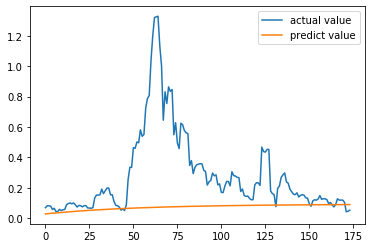

In [41]:
# forecast the test set
yhat = model_fit1.forecast(horizon=n_test)
# plot the actual variance

plt.plot(test.values, label='actual value')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :]*3, label='predict value')
plt.legend()
plt.show()

In [42]:
# retrain the model with full dataset
model_garch = arch_model(df["Annual Volatility"],mean='Zero', vol='GARCH', p=20, q=20)
model_fit = model_garch.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01816. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:     43,   Neg. LLF: -595.511587287744
Iteration:      2,   Func. Count:     86,   Neg. LLF: -972.9341888750579
Iteration:      3,   Func. Count:    133,   Neg. LLF: -978.1436366451821
Iteration:      4,   Func. Count:    177,   Neg. LLF: -978.7438678667247
Iteration:      5,   Func. Count:    221,   Neg. LLF: -978.820745970194
Iteration:      6,   Func. Count:    265,   Neg. LLF: -979.0550261964181
Iteration:      7,   Func. Count:    309,   Neg. LLF: -979.7107550635811
Iteration:      8,   Func. Count:    353,   Neg. LLF: -979.7464385217818
Iteration:      9,   Func. Count:    397,   Neg. LLF: -979.7608611326224
Iteration:     10,   Func. Count:    441,   Neg. LLF: -979.775948749659
Iteration:     11,   Func. Count:    485,   Neg. LLF: -979.783572602782
Iteration:     12,   Func. Count:    529,   Neg. LLF: -979.7866498610368
Iteration:     13,   Func. Count:    573,   Neg. LLF: -979.7917931179863
Iteration:     14,   Func. Count:    616,   Neg. LLF: -

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:      Annual Volatility   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                979.798
Distribution:                  Normal   AIC:                          -1877.60
Method:            Maximum Likelihood   BIC:                          -1667.07
                                        No. Observations:                 1255
Date:                Fri, Aug 28 2020   Df Residuals:                     1214
Time:                        15:50:49   Df Model:                           41
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.4592e-04  1.064e-03      0.607      0.544 [-1.439e-03,2.731e-03]
alpha[1]       0.9557  3.879e-02     24.641 4.626e-134      [  0.880,  1.032]
alpha[2]       0.0000      0.985      0.000      1.000      [ -1.931,  1.931]
alpha[3]       0.0000      0.313      0.000      1.000      [ -0.613,  0.613]
alpha[4]       0.0000      0.709      0.000      1.000      [ -1.389,  1.389]
alpha[5]       0.0000      0.314      0.000      1.000      [ -0.615,  0.615]
alpha[6]       0.0120      0.507  2.356e-02      0.981      [ -0.982,  1.006]
alpha[7]       0.0000      0.275      0.000      1.000      [ -0.540,  0.540]
alpha[8]       0.0000      0.538      0.000      1.000      [ -1.055,  1.055]
alpha[9]   2.5822e-09      0.940  2.747e-09      1.000      [ -1.843,  1.843]
alpha[10]      0.0000      0.466      0.000      1.000      [ -0.912,  0.912]
alpha[11]      0.0000      0.431      0.000      1.000      [ -0.844,  0.844]
alpha[12]      0.0000      0.634      0.000      1.000      [ -1.243,  1.243]
alpha[13]      0.0000      0.457      0.000      1.000      [ -0.895,  0.895]
alpha[14]      0.0000      0.795      0.000      1.000      [ -1.559,  1.559]
alpha[15]      0.0000      0.434      0.000      1.000      [ -0.850,  0.850]
alpha[16]      0.0000      0.437      0.000      1.000      [ -0.857,  0.857]
alpha[17]  8.1127e-09      0.481  1.686e-08      1.000      [ -0.943,  0.943]
alpha[18]      0.0000      0.295      0.000      1.000      [ -0.578,  0.578]
alpha[19]      0.0000      0.348      0.000      1.000      [ -0.682,  0.682]
alpha[20]      0.0000      0.382      0.000      1.000      [ -0.749,  0.749]
beta[1]        0.0000      1.003      0.000      1.000      [ -1.966,  1.966]
beta[2]        0.0000      0.326      0.000      1.000      [ -0.638,  0.638]
beta[3]        0.0000      0.712      0.000      1.000      [ -1.396,  1.396]
beta[4]        0.0000      0.316      0.000      1.000      [ -0.620,  0.620]
beta[5]        0.0000      0.517      0.000      1.000      [ -1.013,  1.013]
beta[6]        0.0000      0.284      0.000      1.000      [ -0.557,  0.557]
beta[7]        0.0000      0.590      0.000      1.000      [ -1.155,  1.155]
beta[8]        0.0122      1.000  1.216e-02      0.990      [ -1.948,  1.972]
beta[9]        0.0000      0.486      0.000      1.000      [ -0.953,  0.953]
beta[10]       0.0000      0.453      0.000      1.000      [ -0.887,  0.887]
beta[11]       0.0000      0.624      0.000      1.000      [ -1.223,  1.223]
beta[12]       0.0000      0.498      0.000      1.000      [ -0.975,  0.975]
beta[13]       0.0000      0.813      0.000      1.000      [ -1.594,  1.594]
beta[14]       0.0000      0.441      0.000      1.000      [ -0.864,  0.864]
beta[15]       0.0000      0.414      0.000      1.000      [ -0.811,  0.811]
beta[16]   8.6484e-03      0.478  1.810e-0

In [43]:
# forecast the test set
yhat = model_fit1.forecast(horizon=5)
yhat.variance.values[-1, :]*4

array([0.03848852, 0.04034959, 0.04196299, 0.04340651, 0.04472736])

# Deep Learning models

## (1) LSTM

In [44]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [45]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [46]:
df.set_index('Date', inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return,EMA_5day,EMA_20day,EMA_60day,SMA_5,Lag_Volatility1,Lag_Volatility5,Annual Volatility
Date,,,,,,,,,,,,,,
2015-08-28,198.500000,199.839996,197.919998,199.279999,180.415207,160414400,0.000050,0.455920,0.455920,0.455920,178414140.0,0.136702,0.136888,0.455920
2015-08-31,198.110001,199.130005,197.009995,197.669998,178.957611,163298800,-0.008079,0.418965,0.445362,0.452285,178414140.0,0.455920,0.136888,0.345054
2015-09-01,193.119995,194.770004,190.729996,191.770004,173.616119,256000400,-0.029848,0.411886,0.440825,0.450497,178414140.0,0.345054,0.136888,0.397728
2015-09-02,194.619995,195.460007,192.419998,195.410004,176.911545,160269300,0.018981,0.380143,0.428999,0.446108,178414140.0,0.397728,0.136888,0.316655
2015-09-03,196.259995,198.050003,194.960007,195.550003,177.038300,152087800,0.000716,0.340659,0.413065,0.440062,178414140.0,0.316655,0.136888,0.261691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,337.940002,338.339996,336.850006,337.910004,337.910004,35481000,0.003177,0.115318,0.121923,0.182945,49596940.0,0.119524,0.074811,0.119776
2020-08-18,338.339996,339.100006,336.609985,338.640015,338.640015,38733900,0.002160,0.111912,0.120321,0.180393,43423500.0,0.119776,0.091455,0.105098
2020-08-19,339.049988,339.609985,336.619995,337.230011,337.230011,68054200,-0.004164,0.088902,0.112946,0.175884,46269120.0,0.105098,0.128321,0.042882


In [84]:
values[5]

array([0.06706655, 0.06271684, 0.06765485, 0.06212485, 0.040434  ,
       0.5022466 , 0.471371  , 0.25148636, 0.4626851 , 0.80725944,
       0.5256152 , 0.18740058, 0.33541843, 0.2835424 ], dtype=float32)

In [138]:
values = df.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = values
scaled[:, :-1] = scaler.fit_transform(values[:, :-1])
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 5)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var5(t+4),var6(t+4),var7(t+4),var8(t+4),var9(t+4),var10(t+4),var11(t+4),var12(t+4),var13(t+4),var14(t+4)
1,0.103120,0.101144,0.107967,0.104840,0.075631,0.376782,0.547296,0.364414,0.533015,0.851284,...,0.040434,0.502247,0.471371,0.251486,0.462685,0.807259,0.525615,0.187401,0.335418,0.283542
2,0.100632,0.096581,0.102153,0.094560,0.067161,0.384537,0.506655,0.333340,0.519560,0.843660,...,0.065898,0.257442,0.672682,0.254235,0.454274,0.800142,0.492142,0.204053,0.250930,0.331426
3,0.068789,0.068565,0.062033,0.056889,0.036120,0.633768,0.397826,0.327388,0.513779,0.839908,...,0.052009,0.347029,0.480196,0.238806,0.439191,0.789023,0.416623,0.240544,0.291072,0.269842
4,0.078361,0.072998,0.072829,0.080130,0.055270,0.376392,0.641938,0.300696,0.498709,0.830705,...,0.057585,0.371934,0.574250,0.218989,0.421417,0.775930,0.415449,0.193612,0.229288,0.235838
5,0.088826,0.089641,0.089056,0.081024,0.056007,0.354396,0.550627,0.267495,0.478404,0.818023,...,0.062268,0.267297,0.569764,0.206398,0.405603,0.763418,0.392510,0.167699,0.187401,0.238048


In [139]:
scaled[-1,:]
x = scaled[-1,:].reshape(1,1,14)
x

array([[[0.99278927, 1.0000001 , 1.        , 0.9999999 , 1.        ,
         0.09365919, 0.5647794 , 0.03788712, 0.08142389, 0.24690698,
         0.03055687, 0.02349731, 0.07905876, 0.05317323]]], dtype=float32)

In [140]:
reframed.shape

(1250, 84)

In [141]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[a for a in range(14, 83)]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.103120   0.101144   0.107967   0.104840   0.075631   0.376782   
2   0.100632   0.096581   0.102153   0.094560   0.067161   0.384537   
3   0.068789   0.068565   0.062033   0.056889   0.036120   0.633768   
4   0.078361   0.072998   0.072829   0.080130   0.055270   0.376392   
5   0.088826   0.089641   0.089056   0.081024   0.056007   0.354396   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.547296   0.364414   0.533015    0.851284    0.492571    0.092150   
2   0.506655   0.333340   0.519560    0.843660    0.492571    0.335418   
3   0.397826   0.327388   0.513779    0.839908    0.492571    0.250930   
4   0.641938   0.300696   0.498709    0.830705    0.492571    0.291072   
5   0.550627   0.267495   0.478404    0.818023    0.492571    0.229288   

   var13(t-1)  var14(t-1)  var14(t+4)  
1    0.092291    0.455920    0.283542  
2    0.092291    0.345054    0.331426  
3    0.0

(1000, 1, 14) (1000,) (250, 1, 14) (250,)
Train on 1000 samples, validate on 250 samples
Epoch 1/50
 - 0s - loss: 0.0632 - val_loss: 0.1083
Epoch 2/50
 - 0s - loss: 0.0485 - val_loss: 0.0973
Epoch 3/50
 - 0s - loss: 0.0481 - val_loss: 0.0935
Epoch 4/50
 - 0s - loss: 0.0450 - val_loss: 0.0875
Epoch 5/50
 - 0s - loss: 0.0433 - val_loss: 0.0847
Epoch 6/50
 - 0s - loss: 0.0421 - val_loss: 0.0837
Epoch 7/50
 - 0s - loss: 0.0418 - val_loss: 0.0830
Epoch 8/50
 - 0s - loss: 0.0413 - val_loss: 0.0832
Epoch 9/50
 - 0s - loss: 0.0411 - val_loss: 0.0830
Epoch 10/50
 - 0s - loss: 0.0410 - val_loss: 0.0832
Epoch 11/50
 - 0s - loss: 0.0412 - val_loss: 0.0831
Epoch 12/50
 - 0s - loss: 0.0412 - val_loss: 0.0830
Epoch 13/50
 - 0s - loss: 0.0412 - val_loss: 0.0830
Epoch 14/50
 - 0s - loss: 0.0411 - val_loss: 0.0830
Epoch 15/50
 - 0s - loss: 0.0412 - val_loss: 0.0829
Epoch 16/50
 - 0s - loss: 0.0411 - val_loss: 0.0828
Epoch 17/50
 - 0s - loss: 0.0411 - val_loss: 0.0830
Epoch 18/50
 - 0s - loss: 0.0410 - v

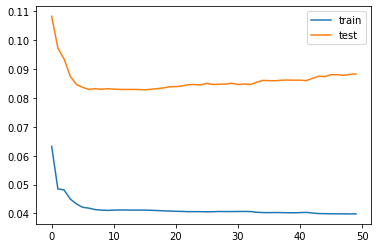

In [142]:
# LSTM
values = reframed.values
train = values[:1000,:]
test = values[1000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [143]:
test_X.shape

(250, 1, 14)

In [144]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, 1:], yhat), axis=1)
inv_yhat[:, :-1] = scaler.inverse_transform(inv_yhat[:, :-1])
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 1:], test_y), axis=1)
inv_y[:, :-1] = scaler.inverse_transform(inv_y[:, :-1])
inv_y = inv_y[:,-1]
# calculate RMSEtest_y
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.165


In [102]:
inv_y.shape

(250, 14)

In [145]:
# retrain the model with all data
# LSTM
values = reframed.values
#train = values[:1000,:]
#test = values[1000:, :]
# split into input and outputs
train_X, train_y = values[:, :-1], values[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(train_X.shape, test_X.shape)

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, verbose=2, shuffle=False)

(1250, 1, 14) (250, 14)
Epoch 1/100
 - 0s - loss: 0.0913
Epoch 2/100
 - 0s - loss: 0.0651
Epoch 3/100
 - 0s - loss: 0.0582
Epoch 4/100
 - 0s - loss: 0.0511
Epoch 5/100
 - 0s - loss: 0.0500
Epoch 6/100
 - 0s - loss: 0.0497
Epoch 7/100
 - 0s - loss: 0.0490
Epoch 8/100
 - 0s - loss: 0.0488
Epoch 9/100
 - 0s - loss: 0.0487
Epoch 10/100
 - 0s - loss: 0.0486
Epoch 11/100
 - 0s - loss: 0.0484
Epoch 12/100
 - 0s - loss: 0.0485
Epoch 13/100
 - 0s - loss: 0.0484
Epoch 14/100
 - 0s - loss: 0.0484
Epoch 15/100
 - 0s - loss: 0.0482
Epoch 16/100
 - 0s - loss: 0.0482
Epoch 17/100
 - 0s - loss: 0.0483
Epoch 18/100
 - 0s - loss: 0.0482
Epoch 19/100
 - 0s - loss: 0.0481
Epoch 20/100
 - 0s - loss: 0.0481
Epoch 21/100
 - 0s - loss: 0.0481
Epoch 22/100
 - 0s - loss: 0.0483
Epoch 23/100
 - 0s - loss: 0.0482
Epoch 24/100
 - 0s - loss: 0.0482
Epoch 25/100
 - 0s - loss: 0.0481
Epoch 26/100
 - 0s - loss: 0.0480
Epoch 27/100
 - 0s - loss: 0.0479
Epoch 28/100
 - 0s - loss: 0.0479
Epoch 29/100
 - 0s - loss: 0.0481

In [146]:
# predict value
y_pred = model.predict(x)

**final prediction**

In [147]:
y_pred

array([[0.09574651]], dtype=float32)

## LSTM2

In [156]:
reframed.shape

(1250, 15)

In [187]:
reframed6 = reframed.values.reshape([250, 5, 15])

In [188]:
values = reframed6
train = values[:200, ...]
test = values[200:, ...]
# split into input and outputs
train_X, train_y = train[..., :-1], train[..., -1]
test_X, test_y = test[..., :-1], test[..., -1]
# reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 5, 14) (200, 5) (50, 5, 14) (50, 5)


Train on 200 samples, validate on 50 samples
Epoch 1/100
 - 1s - loss: 0.0738 - val_loss: 0.1221
Epoch 2/100
 - 0s - loss: 0.0612 - val_loss: 0.1207
Epoch 3/100
 - 0s - loss: 0.0515 - val_loss: 0.0980
Epoch 4/100
 - 0s - loss: 0.0481 - val_loss: 0.0974
Epoch 5/100
 - 0s - loss: 0.0440 - val_loss: 0.0888
Epoch 6/100
 - 0s - loss: 0.0424 - val_loss: 0.0844
Epoch 7/100
 - 0s - loss: 0.0424 - val_loss: 0.0848
Epoch 8/100
 - 0s - loss: 0.0421 - val_loss: 0.0803
Epoch 9/100
 - 0s - loss: 0.0440 - val_loss: 0.0808
Epoch 10/100
 - 0s - loss: 0.0442 - val_loss: 0.0790
Epoch 11/100
 - 0s - loss: 0.0433 - val_loss: 0.0799
Epoch 12/100
 - 0s - loss: 0.0413 - val_loss: 0.0813
Epoch 13/100
 - 0s - loss: 0.0387 - val_loss: 0.0780
Epoch 14/100
 - 0s - loss: 0.0381 - val_loss: 0.0776
Epoch 15/100
 - 0s - loss: 0.0369 - val_loss: 0.0760
Epoch 16/100
 - 0s - loss: 0.0370 - val_loss: 0.0771
Epoch 17/100
 - 0s - loss: 0.0369 - val_loss: 0.0763
Epoch 18/100
 - 0s - loss: 0.0379 - val_loss: 0.0786
Epoch 19/1

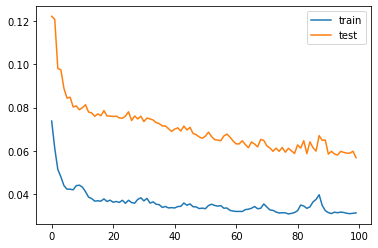

In [236]:
# LSTM
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from numpy.random import seed
seed(42)

# design network
model = Sequential()
model.add(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(32))
model.add(Dense(5))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [237]:
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
'''inv_yhat = np.concatenate((test_X[..., 1:], yhat[..., None]), axis=-1)
inv_yhat13 = inv_yhat[..., :-1]
inv_yhat[..., :-1] = scaler.inverse_transform(inv_yhat13.reshape((-1, 13))).reshape(inv_yhat13.shape)
inv_yhat = inv_yhat[...,-1]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[..., 1:], test_y[..., None]), axis=-1)
inv_y13 = inv_y[..., :-1]
inv_y[..., :-1] = scaler.inverse_transform(inv_y13.reshape((-1, 14))).reshape(inv_y13.shape)
inv_y = inv_y[...,-1]'''
# calculate RMSEtest_y
rmse = np.sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.109


In [238]:
x = scaled[-5:,:].reshape(1,5,14)
x

array([[[0.9929168 , 0.9911324 , 0.9955282 , 0.9899756 , 0.9908763 ,
         0.04089521, 0.5629257 , 0.07801528, 0.10740124, 0.27875262,
         0.03650561, 0.07905876, 0.04498369, 0.11977562],
        [0.99546933, 0.99601614, 0.9939947 , 0.99463665, 0.9951185 ,
         0.04964072, 0.55784523, 0.07515075, 0.10535932, 0.27339935,
         0.01464909, 0.0792504 , 0.05766813, 0.10509823],
        [1.        , 0.9992932 , 0.99405885, 0.98563397, 0.98692465,
         0.12846917, 0.526229  , 0.0558028 , 0.09596124, 0.26394325,
         0.02472375, 0.0680651 , 0.08576287, 0.04288246],
        [0.9764533 , 0.99408805, 0.9851148 , 0.99233806, 0.9930264 ,
         0.0589804 , 0.56261057, 0.04395068, 0.08791135, 0.25505388,
         0.02500111, 0.02065191, 0.07914402, 0.0466162 ],
        [0.99278927, 1.0000001 , 1.        , 0.9999999 , 1.        ,
         0.09365919, 0.5647794 , 0.03788712, 0.08142389, 0.24690698,
         0.03055687, 0.02349731, 0.07905876, 0.05317323]]], dtype=float32)

**final prediction**

In [239]:
y_pred5 = model.predict(x)
y_pred5

array([[0.07230615, 0.09169585, 0.1190447 , 0.12624061, 0.13378209]],
      dtype=float32)

## Actual value 

In [177]:
# forecasting
data = pd.read_csv("SPY_week.csv")
df_latest = data.tail(6)
df_latestL

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-08-21,337.920013,339.720001,337.549988,339.480011,339.480011,55106600
249,2020-08-24,342.119995,343.000000,339.450012,342.920013,342.920013,48588700
250,2020-08-25,343.529999,344.209991,342.269989,344.119995,344.119995,38463400
251,2020-08-26,344.760010,347.859985,344.170013,347.570007,347.570007,50790200
252,2020-08-27,348.510010,349.899994,346.529999,348.329987,348.329987,57903600
253,2020-08-28,349.440002,350.720001,348.160004,350.579987,350.579987,45299407


In [178]:
daily_return = (df_latest["Adj Close"][1:].values - df_latest["Adj Close"][:-1].values)/df_latest["Adj Close"][:-1].values
daily_return

array([0.01013315, 0.00349931, 0.01002561, 0.00218655, 0.00645939])

In [179]:
weekly_volatility = np.sqrt(sum(daily_return**2))*np.sqrt(52)
weekly_volatility

0.11670929259244787